In [1]:
import numpy as np
import pandas as pd

In [2]:
#Importando sellers
seller = pd.read_csv('Datasets/olist_sellers_dataset.csv', sep=',', encoding='iso-8859-1')

In [3]:
#Vendo se existe vendedores repetidos na coluna seller_id dd dataframe seller
print(seller['seller_id'].value_counts())

seller_id
3442f8959a84dea7ee197c632cb2df15    1
e26901d5ab434ce92fd9b5c256820a4e    1
7e3f87d16fb353f408d467e74fbd8014    1
9140bd1d9de28b197dce077bdd687438    1
a2b911e9ad40dc7d61c142a4683e2d85    1
                                   ..
f918546be4bec7104d117789ba758b2b    1
eb4a59a06b3948e851a7d7a830bcbc42    1
80146bc52c4f6af5239b23de2a20262b    1
4091f77d8c768fc3e81c20761471761d    1
9e25199f6ef7e7c347120ff175652c3b    1
Name: count, Length: 3095, dtype: int64


In [4]:
#Importando order_items e criando um novo dataframe 
or_it = pd.read_csv('Datasets/olist_order_items_dataset.csv', sep=',', encoding='iso-8859-1')

In [5]:
#Relacionando dataframes para obter mais informações
seller_or_it1 = pd.merge(seller, or_it, on='seller_id', how='inner')

In [6]:
#Eliminando duplicidade de dados por meio do drop e criando um novo dataframe
seller_or_it = seller_or_it1.drop_duplicates(subset=['seller_id'])

In [7]:
#DESCOBRINDO OS 10 PIORES SELLERS DE ACORDO COM A RECEITA

In [8]:
# Passo 1: Calculando a receita de cada vendedor
receita_por_seller = seller_or_it.groupby('seller_id')['price'].sum()

# Passo 2: Ordenando os vendedores com base em sua receita em ordem crescente (menor para o maior)
sellers_ordenados_por_receita = receita_por_seller.sort_values()

# Passo 3: Selecionando os 10 vendedores com a menor receita (os piores)
piores_sellers_10 = sellers_ordenados_por_receita.head(10)
df_top_10 = pd.DataFrame(piores_sellers_10).reset_index()
df_top_10.columns = ['seller_id', 'price']

df_top_10.head(10)

,seller_id,price
0,6338ea67c41078a46ad99cc009654956,3.49
1,cf6f6bc4df3999b9c6440f124fb2f687,3.50
2,a218df5c097b0ca409cfaac1488cc7f6,3.99
3,0e44d110fa6a54e121cb2c095a77762f,4.20
4,9cea4682e16655f7da87f406902e989e,4.78
5,d2f3e277560ed4c6361284429b00f037,5.20
6,077c5fae4bea9500e3737b16f71b9d3a,5.40
7,adcf50477d6a1f5d91bb9d54c4903cb5,5.85
8,1e483cc5c76fef08d3ca05f9a8af7d01,5.90
9,741f8c587cb4248ebc5b779a0e8e0e51,5.99


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

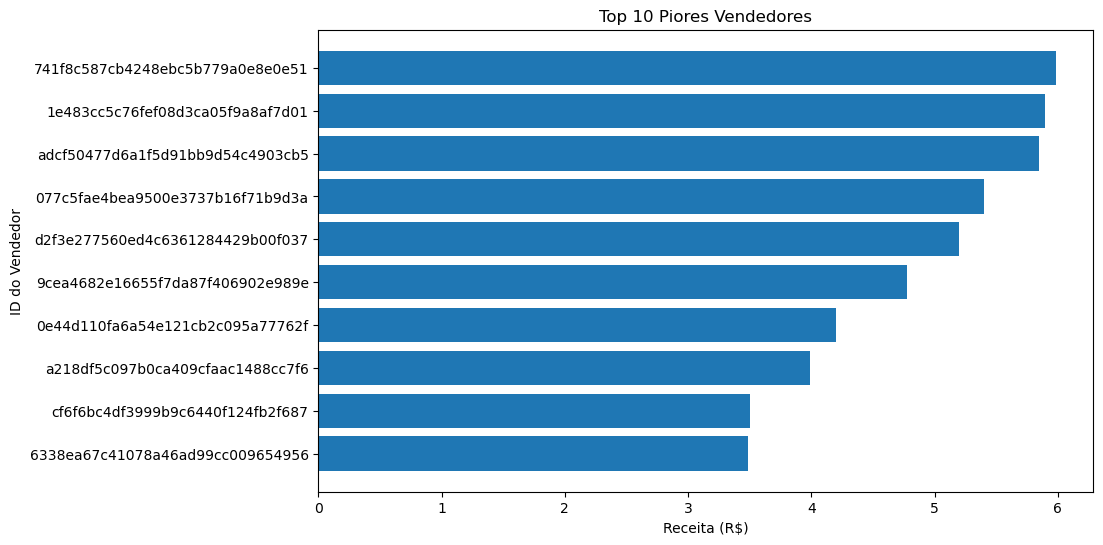

In [11]:
# Criando gráfico em barras para melhor visualização dos piores vendedores
plt.figure(figsize=(10, 6))
plt.barh(df_top_10['seller_id'], df_top_10['price'])
plt.title('Top 10 Piores Vendedores')
plt.xlabel('Receita (R$)')
plt.ylabel('ID do Vendedor')
plt.savefig('Top 10 Piores Vendedores')
plt.show()

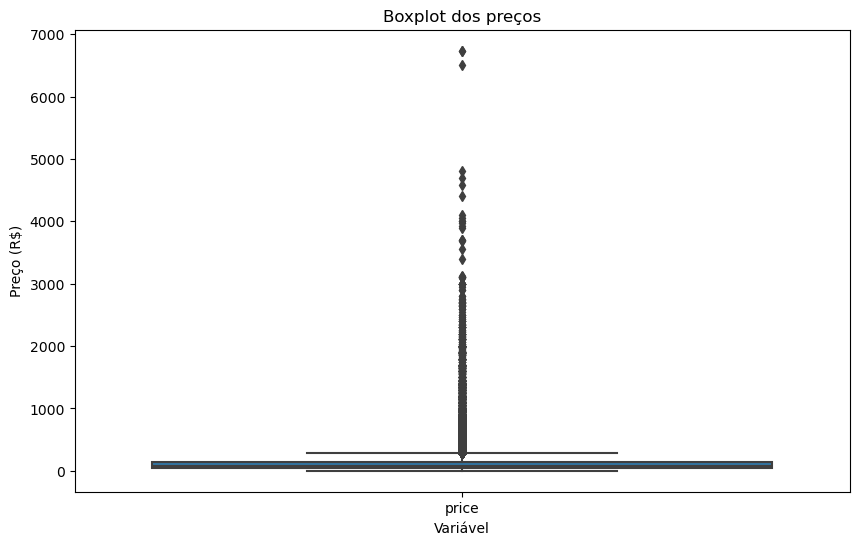

In [12]:
# Tentei fazer os outilier
df = pd.DataFrame(or_it)

# Criar boxplot para cada coluna
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['price']])
plt.title('Boxplot dos preços')
plt.xlabel('Variável')
plt.ylabel('Preço (R$)')
plt.show()
